Projekt MNwS - Aleksander Folfas 411052

In [1]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

Zadanie 15

Za pomocą odpowiednich symulacji zbadać odsetek odrzuceń prawdziwej hipotezy głównej (tzn. błąd
I rodzaju) w klasycznym teście równości dwóch wartości oczekiwanych i w teście Manna-Whitneya w
przypadku, gdy dane w obu próbkach pochodzą z rozkładu normalnego o takiej samej wartości
oczekiwanej, lecz różnią się odchyleniami standardowymi. W każdym przypadku wyznaczyć
empiryczne wartości krytyczne. Porównać te wyniki z rezultatami zastosowania statystyki 𝑡 (np.
funkcja t.test)
Uzyskane wyniki należy opisać zależności od:
- liczby danych w każdej z próbek,
- różnicy odchyleń standardowych.

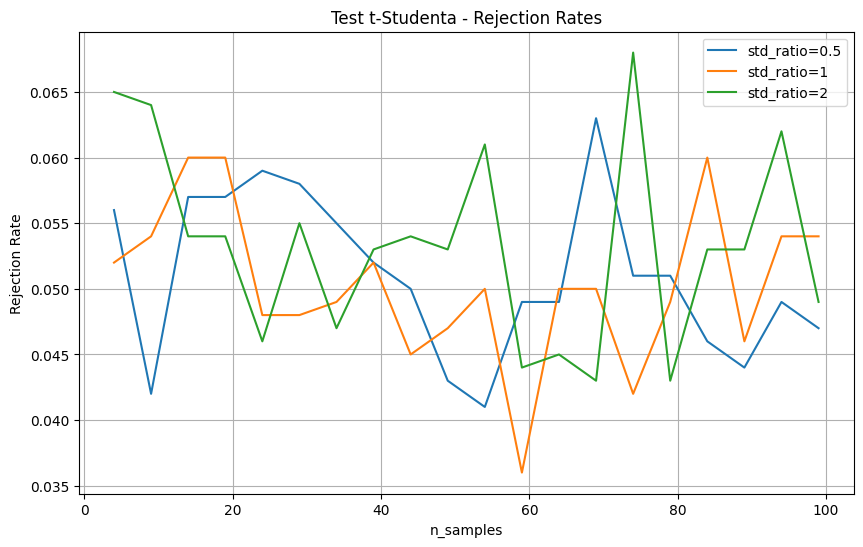

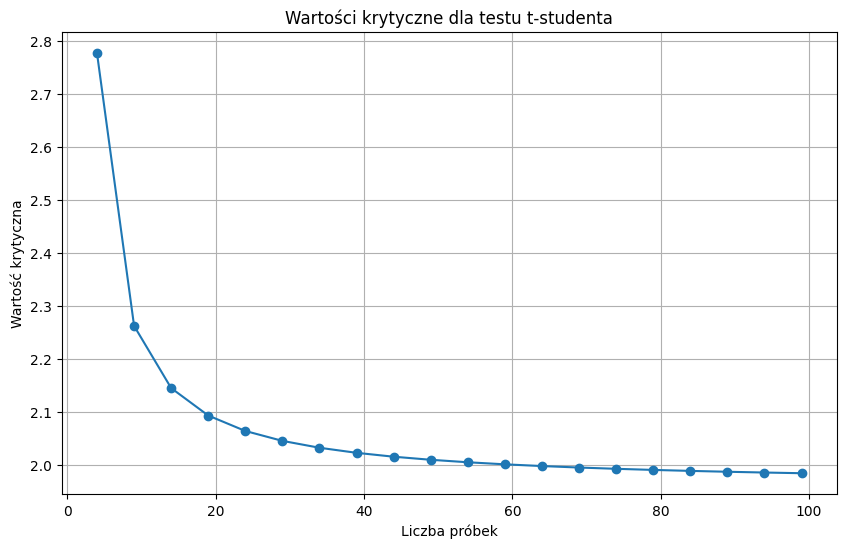

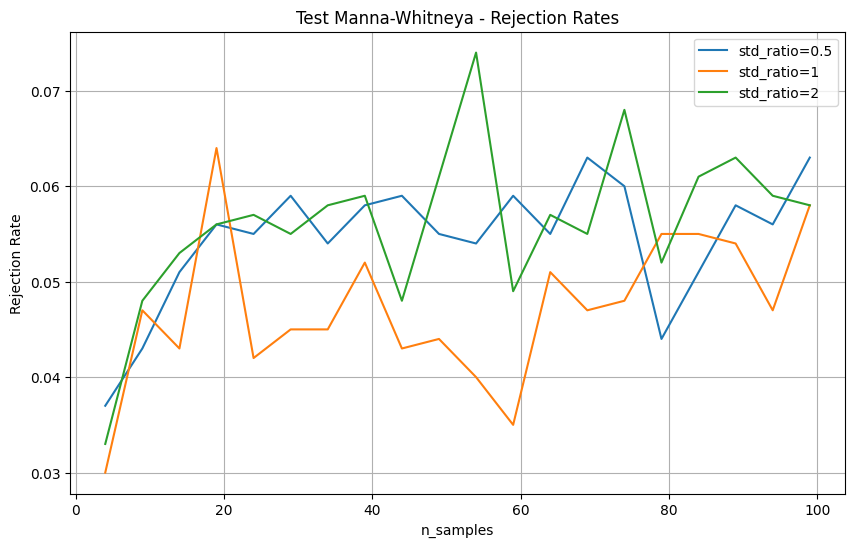

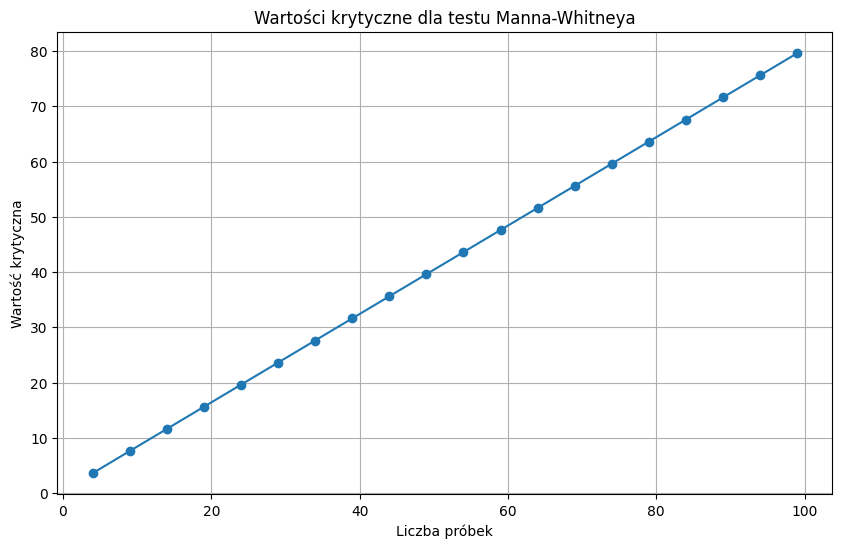

In [2]:
def rejection_rate(n_samples, std1, std2, n_simulations=1000):
    t_rejections = 0
    mw_rejections = 0

    for _ in range(n_simulations):
        # Generowanie danych z dwóch rozkładów normalnych o takiej samej wartości oczekiwanej
        group1 = np.random.normal(loc=0, scale=std1, size=n_samples)
        group2 = np.random.normal(loc=0, scale=std2, size=n_samples)

        # Test t-Studenta (test równości średnich)
        t_stat, t_pvalue = stats.ttest_ind(group1, group2)
        if t_pvalue < alpha:
            t_rejections += 1

        # Test Manna-Whitneya
        mw_stat, mw_pvalue = stats.mannwhitneyu(group1, group2)
        if mw_pvalue < alpha:
            mw_rejections += 1

    t_rejection_rate = t_rejections / n_simulations
    mw_rejection_rate = mw_rejections / n_simulations

    return t_rejection_rate, mw_rejection_rate

# Parametry symulacji
n_samples_range = np.arange(4, 101, 5)
std_ratio_range = [0.5, 1, 2]
alpha = 0.05


# Ziarno generatora liczb pseudolosowych
np.random.seed(411052)

t_rejection_rates = np.zeros((len(n_samples_range), len(std_ratio_range)))
mw_rejection_rates = np.zeros((len(n_samples_range), len(std_ratio_range)))
t_statistics_list = []
mw_statistics_list = []

# Symulacje dla różnych wartości liczby danych i różnicy odchyleń standardowych
for i, n_samples in enumerate(n_samples_range):
    for j, std_ratio in enumerate(std_ratio_range):
        std1 = 1
        std2 = std1 * std_ratio
        t_rejection_rate, mw_rejection_rate = rejection_rate(n_samples, std1, std2)
        t_rejection_rates[i, j] = t_rejection_rate
        mw_rejection_rates[i, j] = mw_rejection_rate

# Empiryczne wyznaczanie wartości krytycznej dla testu t-Studenta
critical_t_values = []
for n_samples in n_samples_range:
    critical_t_values.append(stats.t.ppf(1 - alpha / 2, n_samples))

# Konwertowanie listy critical_t_values na tablicę NumPy
critical_t_values = np.array(critical_t_values)


# Empiryczne wyznaczanie wartości krytycznej dla testu Manna-Whitneya
critical_mw_values = []
for n_samples in n_samples_range:
    z_critical = stats.norm.ppf(1 - alpha / 2)  # Wartość krytyczna dla rozkładu normalnego
    critical_mw = z_critical * np.sqrt(2 * n_samples * (n_samples + 1) / 12)
    critical_mw_values.append(critical_mw)
# Konwertowanie listy critical_mw_values na tablicę NumPy
critical_mw_values = np.array(critical_mw_values)

# Wykres dla testu t-Studenta (Rejection Rates)
plt.figure(figsize=(10, 6))
for j, std_ratio in enumerate(std_ratio_range):
    plt.plot(n_samples_range, t_rejection_rates[:, j], label=f'std_ratio={std_ratio}')
plt.xlabel('n_samples')
plt.ylabel('Rejection Rate')
plt.title('Test t-Studenta - Rejection Rates')
plt.legend()
plt.grid(True)
plt.show()

# Wykres dla testu t-studenta (Critical Values and Statistics)
plt.figure(figsize=(10, 6))
plt.plot(n_samples_range, critical_t_values, '-o')
plt.xlabel('Liczba próbek')
plt.ylabel('Wartość krytyczna')
plt.title('Wartości krytyczne dla testu t-studenta')
plt.grid(True)
plt.show()

# Wykres dla testu Manna-Whitneya (Rejection Rates)
plt.figure(figsize=(10, 6))
for j, std_ratio in enumerate(std_ratio_range):
    plt.plot(n_samples_range, mw_rejection_rates[:, j], label=f'std_ratio={std_ratio}')
plt.xlabel('n_samples')
plt.ylabel('Rejection Rate')
plt.title('Test Manna-Whitneya - Rejection Rates')
plt.legend()
plt.grid(True)
plt.show()

# Wykres dla testu Manna-Whitneya (Critical Values)
plt.figure(figsize=(10, 6))
plt.plot(n_samples_range, critical_mw_values, '-o')
plt.xlabel('Liczba próbek')
plt.ylabel('Wartość krytyczna')
plt.title('Wartości krytyczne dla testu Manna-Whitneya')
plt.grid(True)
plt.show()